In [33]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [95]:
sn_template = pd.read_csv("sn1a_lc.v1.2.dat.gz", compression="gzip", delimiter="\s{1,}", header=None)

/Users/amyxiao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [96]:
sn_template.head(10)

,0,1,2,3,4,5,6,7,8
0,-20.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
1,-19.0,4.32,4.76,5.18,5.13,5.58,6.76,6.94,6.77
2,-18.0,3.44,3.88,4.30,4.25,4.70,5.26,5.44,5.27
3,-17.0,2.81,3.25,3.67,3.62,4.07,4.38,4.56,4.39
4,-16.0,2.33,2.77,3.19,3.14,3.49,3.75,3.93,3.76
5,-15.0,1.93,2.37,2.71,2.66,3.11,3.27,3.45,3.28
6,-14.0,1.57,2.06,2.31,2.26,2.69,2.87,3.05,2.88
7,-13.0,1.18,1.70,2.02,1.90,2.17,2.58,2.76,2.59
8,-12.0,0.80,1.38,1.71,1.55,1.75,2.27,2.45,2.28
9,-11.0,0.46,1.09,1.41,1.11,1.38,1.97,2.15,1.98


In [144]:
sn_template = sn_template.drop(0) # first row temporarily dropped, skewing data

In [158]:
sn_template_min_magnitude = sn_template.iloc[:,1:].min().min()
sn_template_max_magnitude = sn_template.iloc[:,1:].max().max()

In [184]:
template_time = sn_template.loc[:,0].as_matrix()[1:]
len(template_time)

89

In [111]:
y_test = sn_template.iloc[:, 1].as_matrix()[1:]
len(y_test)

90

'\nfor i, x in enumerate(x_vals):\n    if i == 0: continue\n    plt.scatter(x_, sn_template.iloc[i, 1:].as_matrix())\n'

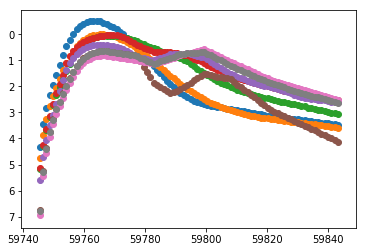

In [157]:
plt.gca().invert_yaxis()

for band in xrange(1, 9):
    band_vals = sn_template.iloc[:, band].as_matrix()
    plt.scatter(template_time, band_vals)

"""
for i, x in enumerate(x_vals):
    if i == 0: continue
    plt.scatter(x_, sn_template.iloc[i, 1:].as_matrix())
"""

In [83]:
sn1_curve = pd.read_csv("sn2007jg_photometry.txt")

In [84]:
sn1_curve.head(5)

,event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
0,SN2007jg,54357.422816,18.472,0.010,F,r',NaN,SDSS,2014arXiv1401.3317S
1,SN2007jg,54357.423645,18.616,0.013,F,i',NaN,SDSS,2014arXiv1401.3317S
2,SN2007jg,54357.424475,20.106,0.068,F,u',NaN,SDSS,2014arXiv1401.3317S
3,SN2007jg,54357.425304,18.474,0.029,F,z',NaN,SDSS,2014arXiv1401.3317S
4,SN2007jg,54357.426133,18.390,0.009,F,g',NaN,SDSS,2014arXiv1401.3317S


In [87]:
sn_magnitude = sn1_curve['magnitude']
sn_time = sn1_curve['time']

In [139]:
sn_time.min()

54357.422815999998

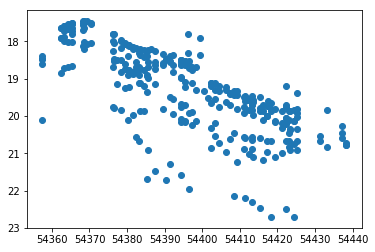

In [91]:
plt.gca().invert_yaxis()

plt.scatter(sn_time, sn_magnitude)

In [93]:
sn_time.min(), sn_time.max()

(54357.422815999998, 54438.398000000001)

In [94]:
sn_magnitude.min(), sn_magnitude.max()

(17.449000000000002, 22.718000000000004)

In [185]:
template_time = (template_time + 20 + sn_time.min())

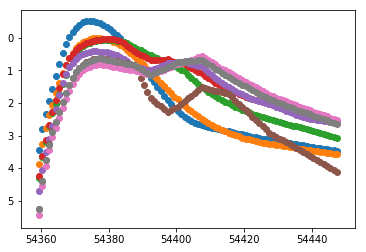

In [187]:
plt.gca().invert_yaxis()

for band in xrange(1, 9):
    band_vals = sn_template.iloc[:, band].as_matrix()[1:]
    plt.scatter(template_time, band_vals)

In [127]:
"""
# if want to scale out t further, but looks like it might not be necessary here:
time_fac = (template_time.max() - template_time.min()) / (sn_time.max() - sn_time.min())
template_time *= time_fac
"""

'\n# if want to scale out t further, but looks like it might not be necessary here:\ntime_fac = (template_time.max() - template_time.min()) / (sn_time.max() - sn_time.min())\ntemplate_time *= time_fac\n'

In [137]:
sn_template_time_scaled = sn_template.loc[0] + 20 + sn_time.min()

In [181]:
sn_max_magnitude = sn_magnitude.max()
sn_min_magnitude = sn_magnitude.min()
sn_max_magnitude, sn_min_magnitude

(22.718000000000004, 17.449000000000002)

In [172]:
sn_template_scale = (sn_template_max_magnitude - sn_template_min_magnitude) / (sn_max_magnitude - sn_min_magnitude)
sn_template_scale

1.417726323780603

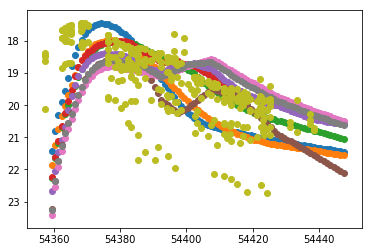

In [190]:
plt.gca().invert_yaxis()

for band in xrange(1, 9):
    band_vals = sn_template.iloc[:, band].as_matrix()[1:]
    plt.scatter(template_time, band_vals+abs(sn_template_min_magnitude)+sn_min_magnitude)

plt.scatter(sn_time, sn_magnitude)

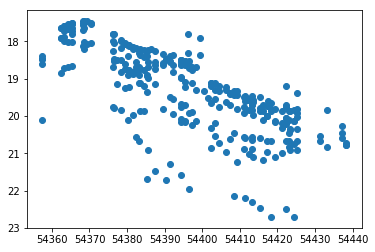

In [180]:
plt.gca().invert_yaxis()

plt.scatter(sn_time, sn_magnitude)

In [191]:
from scipy.stats import chisquare

In [202]:
for band in xrange(1, 9):
    print "Chi square for band {}".format(band), chisquare(sn_template.iloc[:, band].as_matrix()).

 Chi square for band 1 Power_divergenceResult(statistic=89.300496862811599, pvalue=0.47111019660741971)
Chi square for band 2 Power_divergenceResult(statistic=71.831102437470093, pvalue=0.9081651467453915)
Chi square for band 3 Power_divergenceResult(statistic=72.123638780936815, pvalue=0.90392825643611374)
Chi square for band 4 Power_divergenceResult(statistic=66.461045062320224, pvalue=0.96458048214561742)
Chi square for band 5 Power_divergenceResult(statistic=57.031517630873935, pvalue=0.9966586757568584)
Chi square for band 6 Power_divergenceResult(statistic=57.07326812428078, pvalue=0.99661578806221629)
Chi square for band 7 Power_divergenceResult(statistic=62.165479345284503, pvalue=0.98635558354689357)
Chi square for band 8 Power_divergenceResult(statistic=61.909723580693182, pvalue=0.98718655164554225)


In [194]:
sn_magnitude.head(10)

0    18.472
1    18.616
2    20.106
3    18.474
4    18.390
5    17.648
6    17.907
7    18.851
8    17.914
9    17.646
Name: magnitude, dtype: float64